# First Order Trotterized Simulation of the Transverse-Field Ising Model (2-Qubit Version)

In this exercise, we simulate the time evolution of a 2-qubit **transverse-field Ising model (TFIM)** using the **Trotter decomposition**.

---

## Model Hamiltonian

The Hamiltonian of the 1D TFIM is given by:
\\[
H = -J \sum_{i} Z_i Z_{i+1} - h \sum_i X_i
\\]
- \\( J \\): interaction strength between neighboring spins 
- \\( h \\): transverse magnetic field strength 

In our 2-qubit system, this simplifies to:
\\[
H = -J Z_0 Z_1 - h (X_0+X_1)
\\]

---

## Trotterization for Time Evolution

We approximate the full time evolution operator \\( U(t) = e^{-i H t} \\) using **first-order Trotter-Suzuki decomposition**:
\\[
U(t) \approx \left( e^{-i H_Z \Delta t} e^{-i H_X \Delta t} \right)^n
\\]
where:
- \\( H_Z = -J Z_0 Z_1 \\)
- \\( H_X = -h (X_0 + X_1) \\)
- \\( \Delta t \\): Trotter step size
- \\( n = t / \Delta t \\): number of steps

---

## Goal of This Simulation

- Initialize a simple 2-qubit state (e.g. \\( |+\rangle \otimes |0\rangle \\))
- Apply **Trotterized evolution** for multiple steps
- Measure how the **expectation value** of \\( Z_0 \\), i.e. \\( \langle Z_0 \rangle \\), evolves with time

This approach demonstrates how **digital quantum simulation** of a quantum Hamiltonian can be done using gate-based quantum circuits.

---


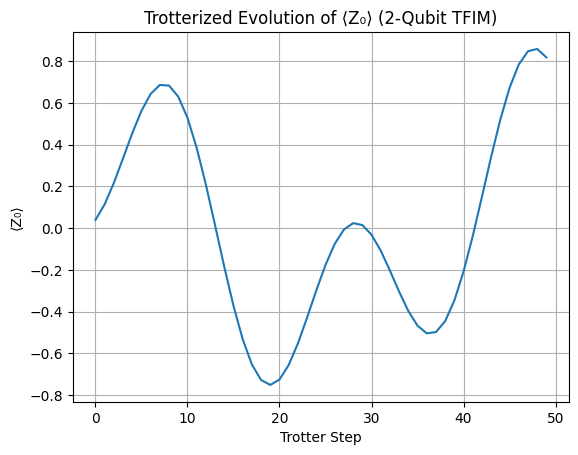

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------
# Purpose:
# This code simulates the time evolution of a 2-qubit transverse-field Ising model
# using Trotter decomposition and computes the expectation value ⟨\sigma_{z_0}: we reprsent it here by Z_0⟩ at each step.
# ----------------------------------------

# Model parameters
J = 1.0          # Coupling strength (Z_i Z_{i+1})
h = 1.0          # Transverse field strength (X_i)
delta_t = 0.1    # Trotter time step size
steps = 50       # Number of Trotter steps to simulate

# Pauli Z observable acting on qubit 0 (ZI)
Z0 = Pauli("ZI")

# Function to apply a single Trotter step
def trotter_step(qc, J, h, delta_t):
    # ZZ interaction term: exp(-i J Z0 Z1 Δt)
    qc.cx(0, 1)
    qc.rz(-2 * J * delta_t, 1)
    qc.cx(0, 1)
    
    # Transverse X-field term: exp(-i h X Δt) = RX(-2hΔt)
    qc.rx(-2 * h * delta_t, 0)
    qc.rx(-2 * h * delta_t, 1)

# Initialize simulation
z_expectations = []

# Use initial state |+⟩ ⊗ |0⟩
psi = Statevector.from_label('+0')  # |+⟩ = (|0⟩ + |1⟩)/√2 on qubit 0

# Apply trotterized time evolution
for step in range(steps):
    qc = QuantumCircuit(2)
    trotter_step(qc, J, h, delta_t)
    
    # Evolve statevector under circuit
    psi = psi.evolve(qc)
    
    # Compute ⟨Z₀⟩ and store it
    z_exp = psi.expectation_value(Z0).real
    z_expectations.append(z_exp)

# Plot ⟨Z₀⟩ vs Trotter step
plt.plot(z_expectations)
plt.xlabel("Trotter Step")
plt.ylabel("⟨Z₀⟩")
plt.title("Trotterized Evolution of ⟨Z₀⟩ (2-Qubit TFIM)")
plt.grid(True)
plt.show()


# Second-Order Trotter Simulation of the 2-Qubit Transverse-Field Ising Model

We simulate the time evolution of a 2-qubit transverse-field Ising model (TFIM) using a **second-order Trotter-Suzuki decomposition**, which improves accuracy compared to the first-order method.

---

## Hamiltonian

\\[
H = -J Z_0 Z_1 - h (X_0 + X_1)
\\]

---

## Second-Order Trotter Formula

To approximate \\( U(t) = e^{-iHt} \\), we split \\( H = H_Z + H_X \\) and use:

\\[
U(\Delta t) \approx e^{-i H_X \Delta t / 2} \, e^{-i H_Z \Delta t} \, e^{-i H_X \Delta t / 2}
\\]

This introduces smaller Trotter error compared to first-order.

---

## Goal

We:
- Evolve the initial state \\( |+\rangle \otimes |0\rangle \\) using the second-order Trotter method
- Track the observable \\( \langle Z_0 \rangle \\) over time

This method mimics more accurate digital quantum simulation of real quantum systems.


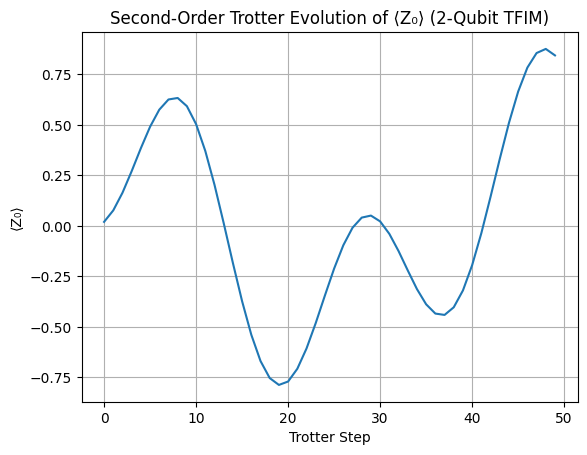

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# Purpose:
# This code simulates the second-order Trotterized evolution of a 2-qubit transverse-field Ising model.
# We compute ⟨Z₀⟩ at each step to observe the system's dynamics.
# ----------------------------------------

# Parameters
J = 1.0          # ZZ interaction strength
h = 1.0          # Transverse X field strength
delta_t = 0.1    # Trotter time step
steps = 50       # Number of Trotter steps

# Observable: Pauli Z on qubit 0
Z0 = Pauli("ZI")

# Build second-order Trotter step
def second_order_trotter_step(qc, J, h, delta_t):
    # Half-step for transverse field (X rotations)
    qc.rx(-h * delta_t, 0)
    qc.rx(-h * delta_t, 1)

    # Full ZZ interaction
    qc.cx(0, 1)
    qc.rz(-2 * J * delta_t, 1)
    qc.cx(0, 1)

    # Half-step again for transverse field
    qc.rx(-h * delta_t, 0)
    qc.rx(-h * delta_t, 1)

# Initial state |+> ⊗ |0>
psi = Statevector.from_label('+0')
z_expectations = []

# Trotter evolution loop
for step in range(steps):
    qc = QuantumCircuit(2)
    second_order_trotter_step(qc, J, h, delta_t)
    psi = psi.evolve(qc)
    z_exp = psi.expectation_value(Z0).real
    z_expectations.append(z_exp)

# Plot ⟨Z₀⟩ vs Trotter step
plt.plot(z_expectations)
plt.xlabel("Trotter Step")
plt.ylabel("⟨Z₀⟩")
plt.title("Second-Order Trotter Evolution of ⟨Z₀⟩ (2-Qubit TFIM)")
plt.grid(True)
plt.show()


# Trotterized Simulation of the 3-Qubit Transverse-Field Ising Model

We simulate time evolution in a 3-qubit transverse-field Ising model (TFIM) using **second-order Trotter decomposition**, which improves accuracy by symmetrically splitting the Hamiltonian.

---

## Hamiltonian

The Hamiltonian is:

\\[
H = -J \sum_{i=0}^{1} Z_i Z_{i+1} - h \sum_{i=0}^{2} X_i
\\]

This includes:
- **Two-body interactions**: \( Z_0 Z_1 \), \( Z_1 Z_2 \)
- **Single-body transverse fields**: \( X_0, X_1, X_2 \)

---

## Second-Order Trotter Decomposition

Each Trotter step is:

\\[
U(\Delta t) \approx e^{-i H_X \Delta t / 2} \, e^{-i H_Z \Delta t} \, e^{-i H_X \Delta t / 2}
\\]

- \\( H_Z \\): pairwise ZZ interactions
- \\( H_X \\): transverse field (X rotations)

---

## Goal

We initialize the system in \( |+\rangle^{\otimes 3} \), apply second-order Trotter evolution, and track the expectation value of \( Z_1 \) over time.


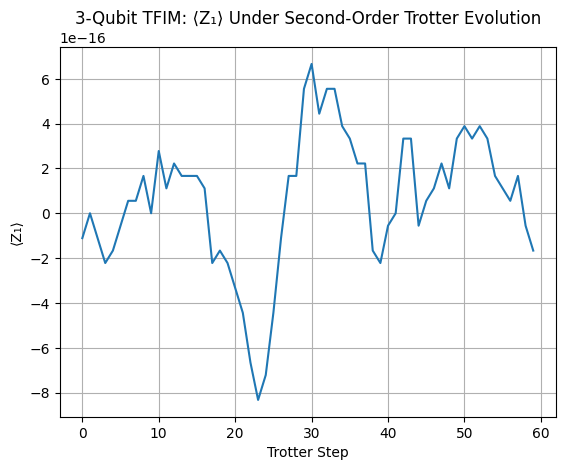

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# Purpose:
# This code simulates 3-qubit transverse-field Ising dynamics using second-order Trotter steps.
# We track ⟨Z₁⟩ over time.
# ----------------------------------------

# Parameters
J = 1.0         # ZZ interaction strength
h = 1.0         # Transverse X field strength
delta_t = 0.1   # Trotter time step
steps = 60      # Number of Trotter steps

# Observable: Z on middle qubit (qubit 1)
Z1 = Pauli("IZI")

# Function to apply one second-order Trotter step
def second_order_trotter_step(qc, J, h, delta_t):
    # Half-step transverse field: RX on each qubit
    for i in range(3):
        qc.rx(-h * delta_t, i)

    # Full ZZ interactions
    for i in range(2):  # (0,1) and (1,2)
        qc.cx(i, i+1)
        qc.rz(-2 * J * delta_t, i+1)
        qc.cx(i, i+1)

    # Half-step transverse field again
    for i in range(3):
        qc.rx(-h * delta_t, i)

# Initialize state |+++⟩ = |+⟩ ⊗ |+⟩ ⊗ |+⟩
psi = Statevector.from_label('+++')
z_expectations = []

# Time evolution loop
for step in range(steps):
    qc = QuantumCircuit(3)
    second_order_trotter_step(qc, J, h, delta_t)
    psi = psi.evolve(qc)
    z_exp = psi.expectation_value(Z1).real
    z_expectations.append(z_exp)

# Plot results
plt.plot(z_expectations)
plt.xlabel("Trotter Step")
plt.ylabel("⟨Z₁⟩")
plt.title("3-Qubit TFIM: ⟨Z₁⟩ Under Second-Order Trotter Evolution")
plt.grid(True)
plt.show()


# Comparing Trotterized vs Exact Evolution in 3-Qubit TFIM

To assess the accuracy of second-order Trotter decomposition, we simulate the same system using the **exact time evolution operator**:

\\[
U_{\text{exact}}(\Delta t) = e^{-i H \Delta t}
\\]

We compute the expectation value \\( \langle Z_1 \rangle \\) for both evolutions over time and compare:

- **Trotter evolution**: decomposed gates using \\( H = H_Z + H_X \\)
- **Exact evolution**: direct matrix exponential of the full Hamiltonian

We also calculate the **fidelity** between the exact and Trotter-evolved statevectors:
\\[
\mathcal{F}(t) = |\langle \psi_{\text{exact}}(t) | \psi_{\text{trotter}}(t) \rangle|^2
\\]


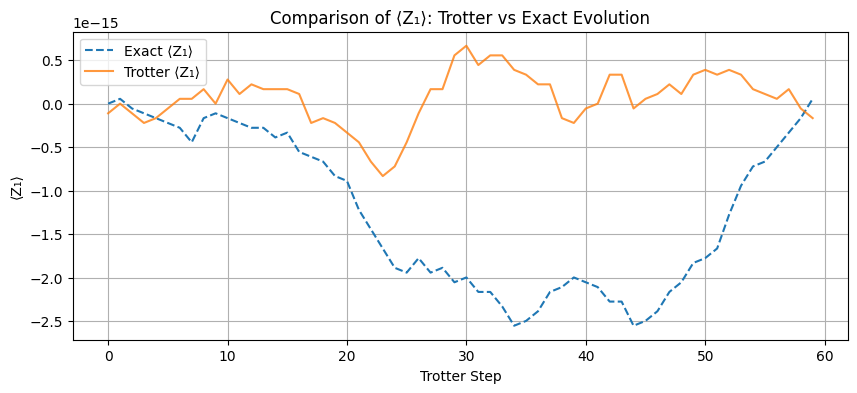

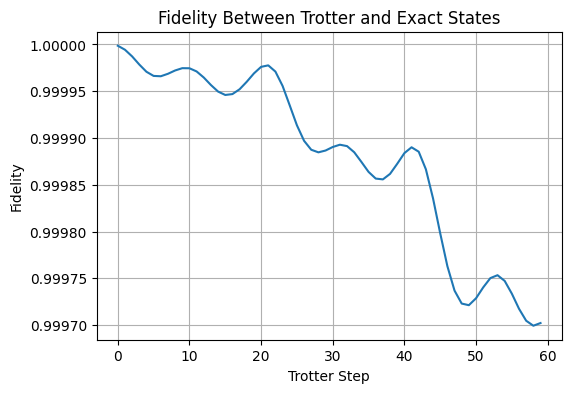

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, Operator
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# System parameters
J = 1.0
h = 1.0
delta_t = 0.1
steps = 60
L = 3  # number of qubits

# Pauli matrices
I = np.eye(2, dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Kronecker product helper
def kron_n(ops):
    result = ops[0]
    for op in ops[1:]:
        result = np.kron(result, op)
    return result

# Build full Hamiltonian H = H_Z + H_X
def build_H(L, J, h):
    H = np.zeros((2**L, 2**L), dtype=complex)

    # ZZ interactions: -J Z_i Z_{i+1}
    for i in range(L - 1):
        ops = [I]*L
        ops[i] = Z
        ops[i+1] = Z
        H -= J * kron_n(ops)

    # X field terms: -h X_i
    for i in range(L):
        ops = [I]*L
        ops[i] = X
        H -= h * kron_n(ops)

    return H

# Build observable ⟨Z₁⟩
Z1 = Pauli("IZI")

# Second-order Trotter step
def second_order_trotter_step(qc, J, h, delta_t):
    for i in range(3):
        qc.rx(-h * delta_t, i)
    for i in range(2):  # (0,1) and (1,2)
        qc.cx(i, i+1)
        qc.rz(-2 * J * delta_t, i+1)
        qc.cx(i, i+1)
    for i in range(3):
        qc.rx(-h * delta_t, i)

# Initial state |+++⟩
psi_trotter = Statevector.from_label('+++')
psi_exact = Statevector.from_label('+++')

# Precompute exact unitary
H = build_H(L, J, h)
U_exact = la.expm(-1j * H * delta_t)
U_exact_op = Operator(U_exact)

# Storage
z_trotter, z_exact, fidelities = [], [], []

# Loop
for _ in range(steps):
    # Trotter evolution
    qc = QuantumCircuit(3)
    second_order_trotter_step(qc, J, h, delta_t)
    psi_trotter = psi_trotter.evolve(qc)

    # Exact evolution
    psi_exact = psi_exact.evolve(U_exact_op)

    # Observables
    z_trotter.append(psi_trotter.expectation_value(Z1).real)
    z_exact.append(psi_exact.expectation_value(Z1).real)

    # Fidelity
    F = abs(psi_exact.inner(psi_trotter))**2
    fidelities.append(F)

# Plot ⟨Z₁⟩ comparison
plt.figure(figsize=(10,4))
plt.plot(z_exact, label="Exact ⟨Z₁⟩", linestyle='--')
plt.plot(z_trotter, label="Trotter ⟨Z₁⟩", alpha=0.8)
plt.xlabel("Trotter Step")
plt.ylabel("⟨Z₁⟩")
plt.title("Comparison of ⟨Z₁⟩: Trotter vs Exact Evolution")
plt.legend()
plt.grid(True)
plt.show()

# Plot fidelity
plt.figure(figsize=(6,4))
plt.plot(fidelities)
plt.xlabel("Trotter Step")
plt.ylabel("Fidelity")
plt.title("Fidelity Between Trotter and Exact States")
plt.grid(True)
plt.show()


# 4-Qubit Transverse-Field Ising Model: Trotter vs Exact Evolution

We simulate a 4-qubit transverse-field Ising model (TFIM):

\\[
H = -J \sum_{i=0}^{2} Z_i Z_{i+1} - h \sum_{i=0}^{3} X_i
\\]

We evolve the initial state \\( |+\rangle^{\otimes 4} \\) using:
- **Second-order Trotter decomposition**
- **Exact evolution** from full matrix exponentiation

We track:
- The observable \\( \langle Z_1 \rangle \\)
- The **fidelity** \\( |\langle \psi_{\text{exact}} | \psi_{\text{trotter}} \rangle|^2 \\)

This allows us to quantify **Trotter error** over time.


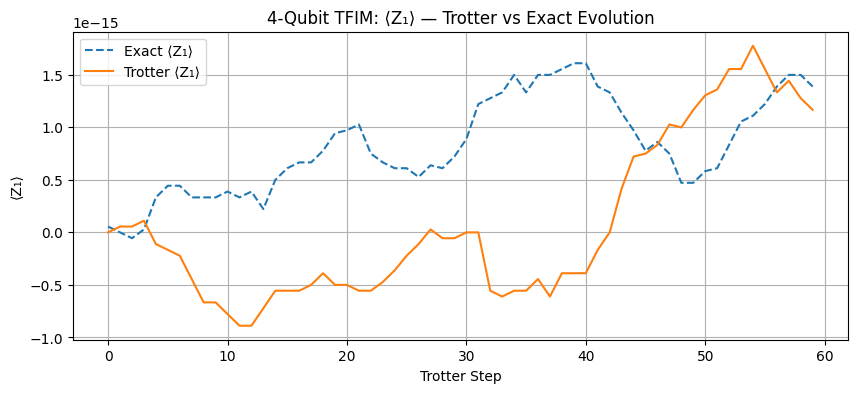

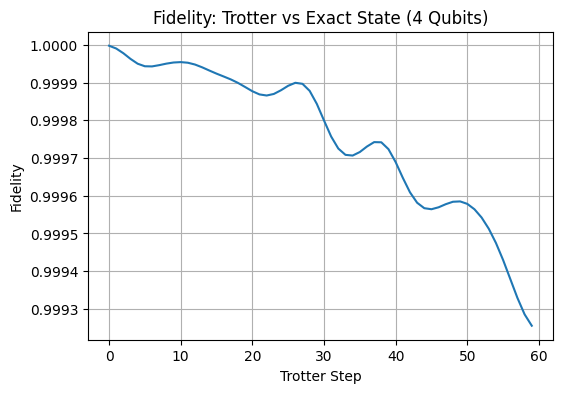

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, Operator
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Parameters
J = 1.0
h = 1.0
delta_t = 0.1
steps = 60
L = 4  # 4 qubits

# Pauli matrices
I = np.eye(2, dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Kronecker helper
def kron_n(ops):
    result = ops[0]
    for op in ops[1:]:
        result = np.kron(result, op)
    return result

# Build full Hamiltonian: H = H_Z + H_X
def build_H(L, J, h):
    H = np.zeros((2**L, 2**L), dtype=complex)

    # ZZ interactions: -J Z_i Z_{i+1}
    for i in range(L - 1):
        ops = [I]*L
        ops[i] = Z
        ops[i+1] = Z
        H -= J * kron_n(ops)

    # X field terms: -h X_i
    for i in range(L):
        ops = [I]*L
        ops[i] = X
        H -= h * kron_n(ops)

    return H

# Observable: ⟨Z₁⟩
Z1 = Pauli("IZII")

# Second-order Trotter step
def second_order_trotter_step(qc, J, h, delta_t):
    for i in range(L):
        qc.rx(-h * delta_t, i)
    for i in range(L - 1):  # ZZ interactions
        qc.cx(i, i+1)
        qc.rz(-2 * J * delta_t, i+1)
        qc.cx(i, i+1)
    for i in range(L):
        qc.rx(-h * delta_t, i)

# Initial state |++++⟩
psi_trotter = Statevector.from_label('+'*L)
psi_exact = Statevector.from_label('+'*L)

# Precompute exact unitary
H = build_H(L, J, h)
U_exact = la.expm(-1j * H * delta_t)
U_exact_op = Operator(U_exact)

# Storage
z_trotter, z_exact, fidelities = [], [], []

# Evolution loop
for _ in range(steps):
    # Trotter step
    qc = QuantumCircuit(L)
    second_order_trotter_step(qc, J, h, delta_t)
    psi_trotter = psi_trotter.evolve(qc)

    # Exact step
    psi_exact = psi_exact.evolve(U_exact_op)

    # Observables
    z_trotter.append(psi_trotter.expectation_value(Z1).real)
    z_exact.append(psi_exact.expectation_value(Z1).real)
    fidelities.append(abs(psi_exact.inner(psi_trotter))**2)

# Plot ⟨Z₁⟩
plt.figure(figsize=(10,4))
plt.plot(z_exact, '--', label="Exact ⟨Z₁⟩")
plt.plot(z_trotter, label="Trotter ⟨Z₁⟩")
plt.xlabel("Trotter Step")
plt.ylabel("⟨Z₁⟩")
plt.title("4-Qubit TFIM: ⟨Z₁⟩ — Trotter vs Exact Evolution")
plt.legend()
plt.grid(True)
plt.show()

# Plot fidelity
plt.figure(figsize=(6,4))
plt.plot(fidelities)
plt.xlabel("Trotter Step")
plt.ylabel("Fidelity")
plt.title("Fidelity: Trotter vs Exact State (4 Qubits)")
plt.grid(True)
plt.show()


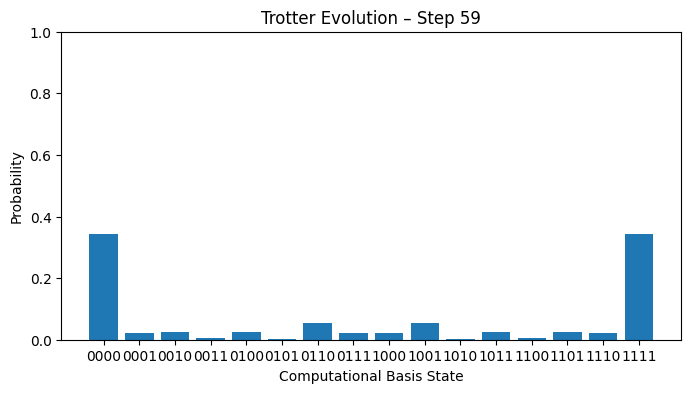

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Collect statevector amplitudes for Trotter evolution
basis_labels = [format(i, f"0{L}b") for i in range(2**L)]
trotter_amplitudes = []

# Reinitialize state
psi = Statevector.from_label('+'*L)

# Collect amplitudes over time
for _ in range(steps):
    qc = QuantumCircuit(L)
    second_order_trotter_step(qc, J, h, delta_t)
    psi = psi.evolve(qc)
    trotter_amplitudes.append(np.abs(psi.data)**2)  # Probabilities

# Animation function
fig, ax = plt.subplots(figsize=(8,4))
bar_container = ax.bar(basis_labels, trotter_amplitudes[0])
ax.set_ylim(0, 1)
ax.set_ylabel("Probability")
ax.set_xlabel("Computational Basis State")
ax.set_title("Trotter Statevector Evolution")

def update(frame):
    for bar, height in zip(bar_container, trotter_amplitudes[frame]):
        bar.set_height(height)
    ax.set_title(f"Trotter Evolution – Step {frame}")
    return bar_container

ani = animation.FuncAnimation(fig, update, frames=range(steps), blit=True, interval=100)

# Display in notebook
HTML(ani.to_jshtml())
